In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)


df = pd.read_csv(r'eda_data_files\chipotle.tsv', sep='\t')

df.drop('choice_description', axis=1, inplace=True)

df.columns = ['주문ID','상품수량','상품명','가격']
df['가격'] = df['가격'].apply(lambda x : float(x[1:]))
df.head()


,주문ID,상품수량,상품명,가격
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98


In [5]:

# 가장 많이 주문한 item top 10을 출력

#df.groupby('상품ID')['가격'].count().sort_values(ascending=False)[:5]
df.groupby('상품명')['상품수량'].sum().sort_values(ascending=False)[:10]        # 주문량


상품명
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: 상품수량, dtype: int64

<Axes: xlabel='상품명'>

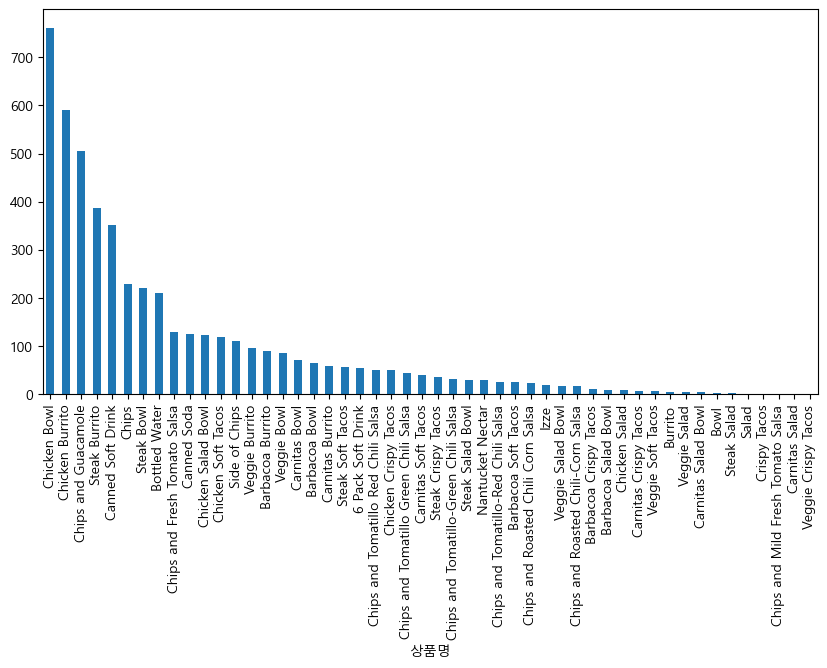

In [6]:
# item당 주문 개수를 출력
df.groupby('상품명')['상품수량'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [11]:
# 주문당 평균 계산금액 
df.groupby('주문ID')['가격'].sum().mean()

df['아이템평균금액'] = df['가격']/df['상품수량']

df.groupby('상품명').아이템평균금액.mean()

상품명
6 Pack Soft Drink                        1.018519
Barbacoa Bowl                            1.000000
Barbacoa Burrito                         1.000000
Barbacoa Crispy Tacos                    1.090909
Barbacoa Salad Bowl                      1.000000
Barbacoa Soft Tacos                      1.000000
Bottled Water                            1.302469
Bowl                                     2.000000
Burrito                                  1.000000
Canned Soda                              1.211538
Canned Soft Drink                        1.166113
Carnitas Bowl                            1.044118
Carnitas Burrito                         1.016949
Carnitas Crispy Tacos                    1.142857
Carnitas Salad                           1.000000
Carnitas Salad Bowl                      1.000000
Carnitas Soft Tacos                      1.000000
Chicken Bowl                             1.048209
Chicken Burrito                          1.068716
Chicken Crispy Tacos                     1.063

In [ ]:
# 한 주문에 10달러 이상 사용한 주문의 id를 출력

# 각 아이템의 가격 구하기
# 가장 비싼 주문에서 iutem이 몇 개 팔렸는지 구하기
# 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기
# 'Chicken Bowl'을 2개 이상 주문한 횟수 구하기